## Capomulin drug regimen has a strong positive correlation of weight and tumor volume.
## The tumor volume significantly decreases with time when the mice are given Capomulin, showing that the treatment is successful. 
## Ramicane has the most successful treatment out of the 4 drug regimens we identified. 

In [15]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [16]:
#locating the data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [ ]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [18]:
#Combining the data
combined_data = pd.merge(study_results, mouse_metadata, how= "left", on=("Mouse ID"))
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice
unique_mice_count = combined_data["Mouse ID"].nunique()
unique_mice_count

249

In [20]:
combined_data[combined_data.duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [21]:
#All the data for the duplicate mouse ID

duplicated_mouse = combined_data[combined_data["Mouse ID"]=="g989"]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
#Clean DataFrame by dropping the duplicate mouse by its ID
clean_data = combined_data[combined_data["Mouse ID"]!="g989"]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data["Mouse ID"].nunique()
clean_mouse_count

248

In [24]:
#Summary Stats
groupby_obj = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

means = groupby_obj.mean()
medians = groupby_obj.median()
variance = groupby_obj.var()
std_dev = groupby_obj.std()
std_error = groupby_obj.sem()


In [25]:
# Used groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assembled the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume Std. Err.": std_error
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Used aggregation method to produce the same summary statistics in a single line

summary_table = clean_data.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0, 0.5, '# of Observed Mouse Timepoints')

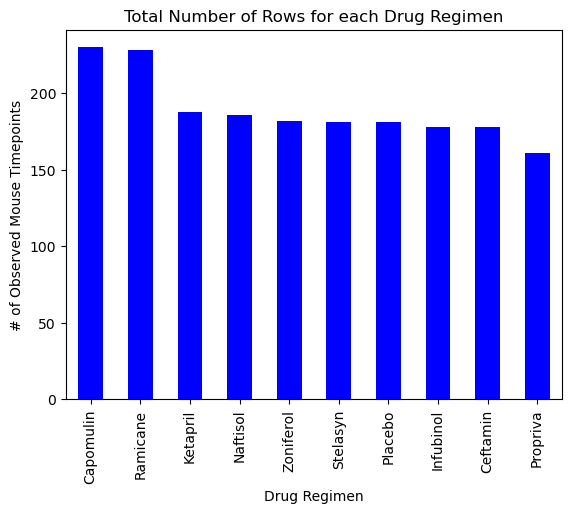

In [27]:
# Bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas

drug_regimen_count = combined_data['Drug Regimen'].value_counts()

drug_regimen_count.plot(kind='bar', color='blue')
plt.title("Total Number of Rows for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

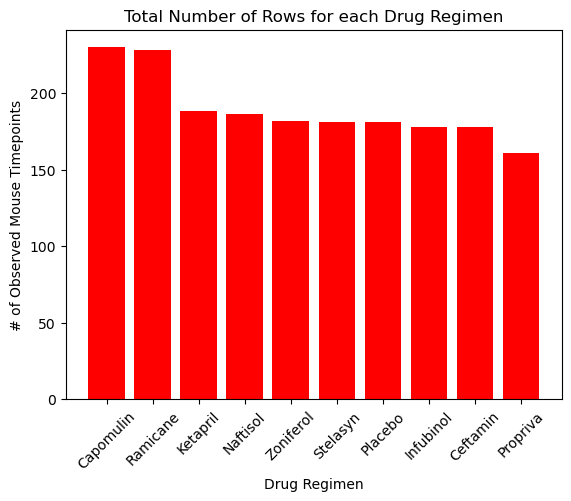

In [28]:
# Bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = combined_data['Drug Regimen'].value_counts()

plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='red')
plt.xlabel('Drug Regimen')
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows for each Drug Regimen")
plt.xticks(rotation=45)
plt.show()


Text(0, 0.5, 'Sex')

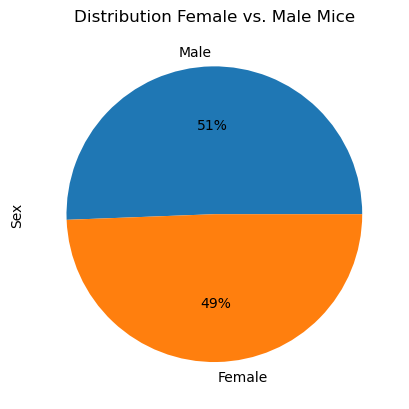

In [46]:
#pie plot showing the distribution of female versus male mice using Pandas
drug_regimen_count = combined_data['Sex'].value_counts()

drug_regimen_count.plot(kind='pie', autopct='%1.0f%%')
plt.title("Distribution Female vs. Male Mice")
plt.ylabel("Sex")

In [30]:
#Finding the Female and Male count to help me better understand the pie chart
female_count = (clean_data["Sex"] == "Female").sum()
print(female_count)

922


In [31]:
female_count = (clean_data["Sex"] == "Male").sum()
print(female_count)

958


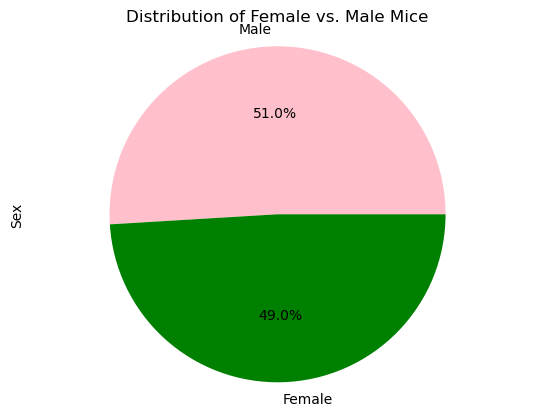

In [48]:
#pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [958, 922] 


plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['pink', 'green'])
plt.axis('equal')
plt.ylabel("Sex")

plt.title('Distribution of Female vs. Male Mice')

plt.show()

In [33]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volume



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for x in treatments:

    final_tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    tumor_vol.append(final_tumor_volume)
    q = final_tumor_volume.quantile([.25, .5, .75])
    lower_q = q[0.25]
    upper_q = q[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    
    print(f"{x}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


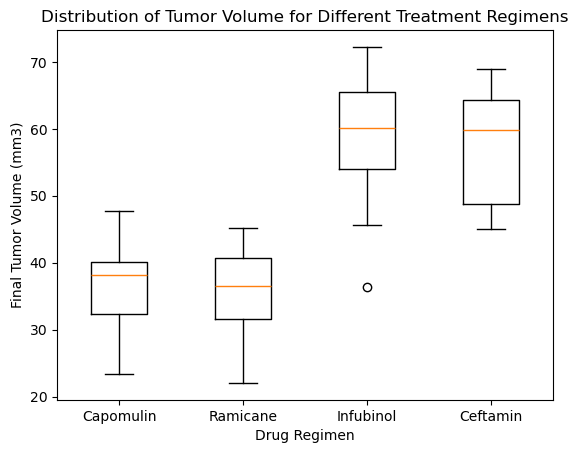

In [35]:
#Box plot that shows the distrubution of the tumor volume for each treatment group

plt.boxplot(tumor_vol, labels=treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Different Treatment Regimens")
plt.show()

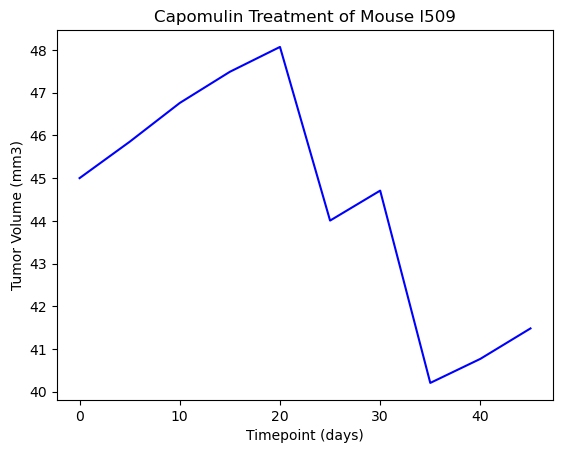

In [36]:
#Line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
tumor_vol_and_timepoint = capomulin[capomulin['Mouse ID'] == 'l509'][['Timepoint', 'Tumor Volume (mm3)']]

plt.plot(tumor_vol_and_timepoint['Timepoint'], tumor_vol_and_timepoint['Tumor Volume (mm3)'], color='blue')

plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

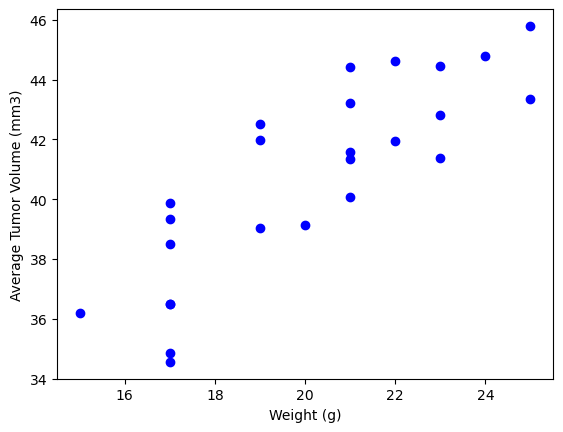

In [37]:
#Scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = drug.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = drug.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(weight, avg_tumor_vol, color='blue')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84 


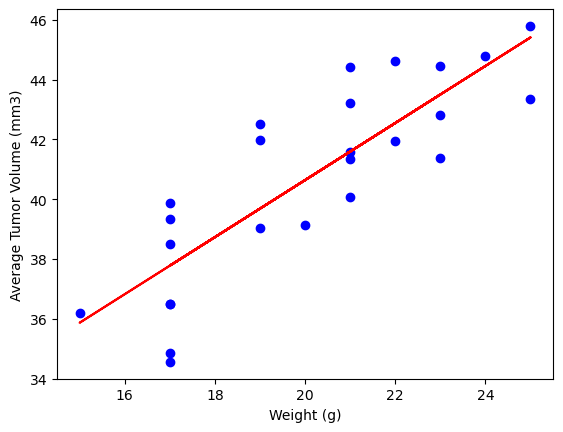

In [38]:
#Correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

drug = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = drug.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = drug.groupby('Mouse ID')['Weight (g)'].mean()

corr_coe = weight.corr(avg_tumor_vol)
slope, intercept = np.polyfit(weight, avg_tumor_vol, 1)
regress_line = slope * weight + intercept


plt.scatter(weight, avg_tumor_vol, color='blue')
plt.plot(weight, regress_line, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {corr_coe:.2f} ")

plt.show()